***Support Vector Machine (SVM)*** is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems.

Because there are many such linear hyperplanes, what SVM additionally guarantee is that the best such function is found by maximizing the margin between the two classes. 

Geometrically, the margin corresponds to the shortest distance between the closest data points to a point on the hyperplane. 

The reason why SVM insists on finding the maximum margin hyperplanes is that it offers the best generalization ability. 

One of the initial drawbacks of SVM is its computational inefficiency.  
- One approach is to break a large optimization problem into a series of smaller problems, where each problem only involves a couple of carefully chosen variables so that the optimization can be done efficiently. The process iterates until all the decomposed optimization problems are solved successfully. 
- A more recent approach is to consider the problem of learning an SVM as that of finding an approximate minimum enclosing ball of a set of instances such as [core vector machine](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.445.4342&rep=rep1&type=pdf).

In practice, real data is messy and cannot be separated perfectly with a hyperplane. The constraint of maximizing the margin of the line that separates the classes must be relaxed. This is often called the soft margin classifier. This change allows some points in the training data to violate the separating line. An additional set of coefficients are introduced that give the margin wiggle room in each dimension. These coefficients are sometimes called slack variables. This increases the complexity of the model as there are more parameters for the model to fit to the data to provide this complexity.

**[Kernel trick](https://en.wikipedia.org/wiki/Kernel_method)**:
- linear kernel
- polynomial kernel
- radial base function kernel
- sigmoid


The loss function is `Hinge loss` which is used for training classifiers. The hinge loss is used for "maximum-margin" classification, most notably for support vector machines (SVMs).

![alt text](http://i.imgur.com/OzCwzyN.png "hinge loss")

**Summary**:
- Support Vector Machines are based on the concept of decision planes that define decision boundaries.
- The Maximal-Margin Classifier that provides a simple theoretical model for understanding SVM.
- The Soft Margin Classifier which is a modification of the Maximal-Margin Classifier to relax the margin to handle noisy class boundaries in real data.
- Support Vector Machines and how the learning algorithm can be reformulated as a dot-product kernel and how other kernels like Polynomial and Radial can be used
- Solving the drawback ,computation inefficiency, of SVM by two approaches.

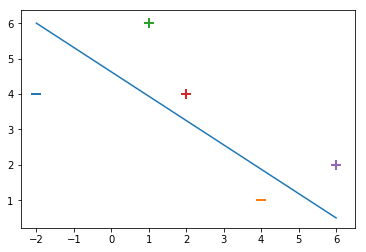

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# produce data
X= np.array([[-2,4,-1],
           [4,1,-1],
           [1,6,-1],
           [2,4,-1],
           [6,2,-1]])

y = np.array([-1,-1,1,1,1])

for k,value in enumerate(X):
    if k<2:
        plt.scatter(value[0],value[1],s=120,marker='_',lw=2)
    else:
        plt.scatter(value[0],value[1],s=120,marker='+',lw=2)
plt.plot([-2,6],[6,0.5])

In [2]:
def svm_sgd_plot(X,y):
    # initializw svm weight vector with zeros
    w = np.zeros(len(X[0]))
    
    learning_rate = 1
    
    epochs = 10000
    # store misclassification
    errors = []
    
    for epoch in range(1,epochs):
        error = 0
        for i,x in enumerate(X):
            if (y[i]*np.dot(X[i],w)) < 1:
                w = w + learning_rate * ((X[i] * y[i]) + (-2 * (1/epoch) * w))
                error = 1
            else:
                w = w + learning_rate * (-2 * (1/epoch) * w)
        errors.append(error)
        
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

/Users/quansun/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


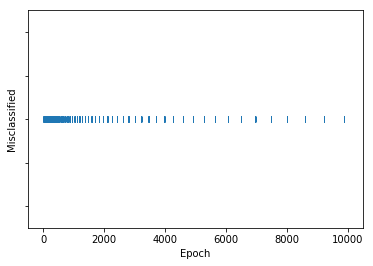

In [3]:
w= svm_sgd_plot(X,y)

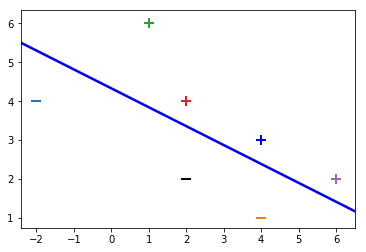

In [4]:
for k,value in enumerate(X):
    if k<2:
        plt.scatter(value[0],value[1],s=120,marker='_',lw=2)
    else:
        plt.scatter(value[0],value[1],s=120,marker='+',lw=2)

# test samples
plt.scatter(2,2,s=120,marker='_',lw=2,color='k')
plt.scatter(4,3,s=120,marker='+',lw=2,color='b')

# hyperplane
x2 = [w[0],w[1],-w[1],w[0]]
x3 = [w[0],w[1],w[1],-w[0]]

x2x3 = np.array([x2,x3])
X,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1,color='blue')